In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots

In [3]:
using FastGaussQuadrature

In [4]:
using TimerOutputs

In [5]:
const to = TimerOutput();

In [6]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [7]:
mat1 = material(1.0^2,1.0)
matSc = material(epstable("silver"),1.0)
mat2 = material(4.0^2,1.0);

In [8]:
matScatter = [mat1; matSc];

In [9]:
layer = layerstructure([mat1,mat2],[0.0,],"up");

In [10]:
w,d = 168.,10.
rc = 2.
Nc,Nw,Nd = 3,30,5
xC = (0.,5.);

In [11]:
rod = Rod(w,d,rc,Nc,Nw,Nd,xC);

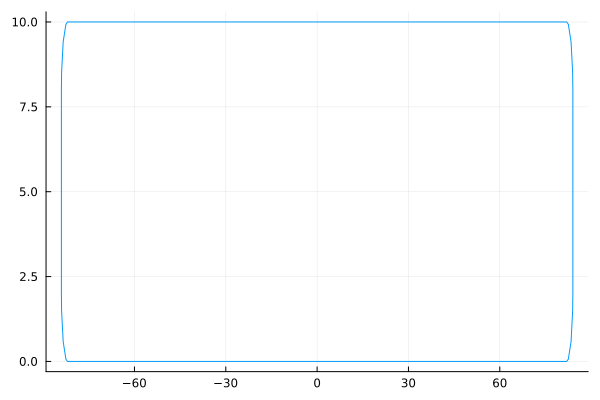

In [12]:
X,Y = getSurfPoints(rod)
plot(X,Y,legend=:none)

In [13]:
dThr = 50.
m = 2

2

In [32]:
i = 1

k0 = 2π/690
n₁ = mat1.n(k0)
n₂ = mat2.n(k0)
r = 500.
α = 90

90

In [15]:
SParms = SommerfieldParams(layer,2k0);

In [16]:
@time Grf = GreenFunctions(matScatter,"layer";xP= (350. , 10), yP = (350.,10), SParms = SParms);

 22.220162 seconds (85.52 M allocations: 3.693 GiB, 5.72% gc time, 39.65% compilation time)


In [33]:
@time H,ϕ = getHϕ(m,rod,k0,Grf,matSc.n,mat1.n,dThr,α,layer,"layer");

 16.955139 seconds (219.19 M allocations: 8.780 GiB, 13.17% gc time)


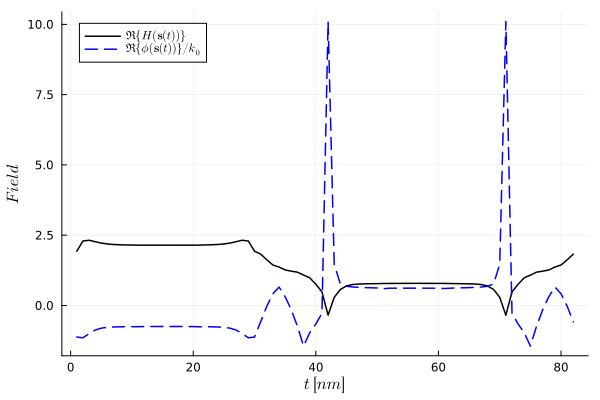

In [34]:
gr()
plot(real.(H[:,1]),c=:black,lw=1.5,label=L"\Re\{ H(\mathbf{s}(t)) \}")
plot!(real.(ϕ[:,1])./k0,c=:blue,lw=1.5,ls=:dash,label=L"\Re\{ \phi(\mathbf{s}(t)) \}/ k_0",xlabel=L"t~[nm]",ylabel=L"Field",legend=:topleft)

# ========================================

In [20]:
k= mat1.k(k0)
kpar = LinRange(0,0.999*k,1000)[:,1]
ϕ = @. 180 * asin(kpar/k)/π;

In [21]:
rtC = rtcoeffs(layer,k0,kpar,"up")
r,t = rtC.r,rtC.t;

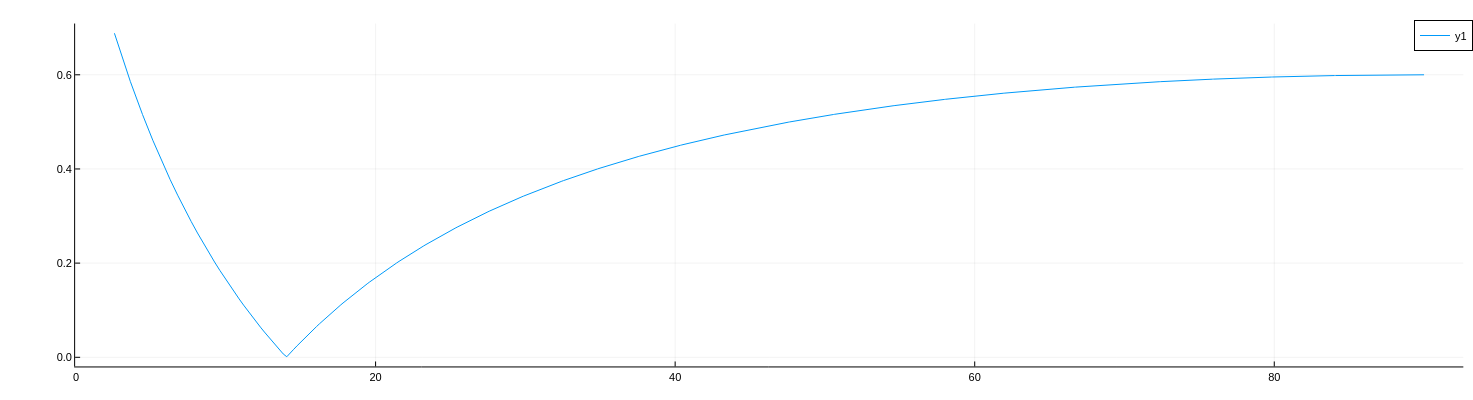

In [22]:
plotly()
plot(90 .-ϕ,abs.(r.TM))